<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Titanic 데이터를 대상으로 모델링를 진행합니다.
- kNN 알고리즘을 사용합니다.
- 다양한 평가지표로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상/하위 몇 개 행 확인
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 하위 몇 개 행 확인
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 기초통계량 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 상관관계 확인
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

In [8]:
# Age 결측치를 Title 별 중앙값(median)으로 채우기
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace= True)

In [9]:
# Embarked 최빈값('S')으로 채우기
data['Embarked'].fillna('S', inplace=True)

**2) 가변수화**

In [10]:
# 가변수화
dummy_vars = ['Pclass', 'Sex', 'Embarked']
data = pd.get_dummies(data,columns=dummy_vars, drop_first=True)

**3) 불필요한 열 제거**

In [14]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(drop_cols, axis = 1, inplace = True)

**4) x, y 분리**

In [15]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target]


**5) 학습용, 평가용 데이터 분리**

In [16]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022) 

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 알고리즘: KNeighborsClassifier

In [17]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [19]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [20]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

# 5.성능 평가

- 다양한 성능지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [21]:
# 모듈 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
confusion_matrix(y_test, y_pred)

array([[134,  34],
       [ 43,  57]], dtype=int64)

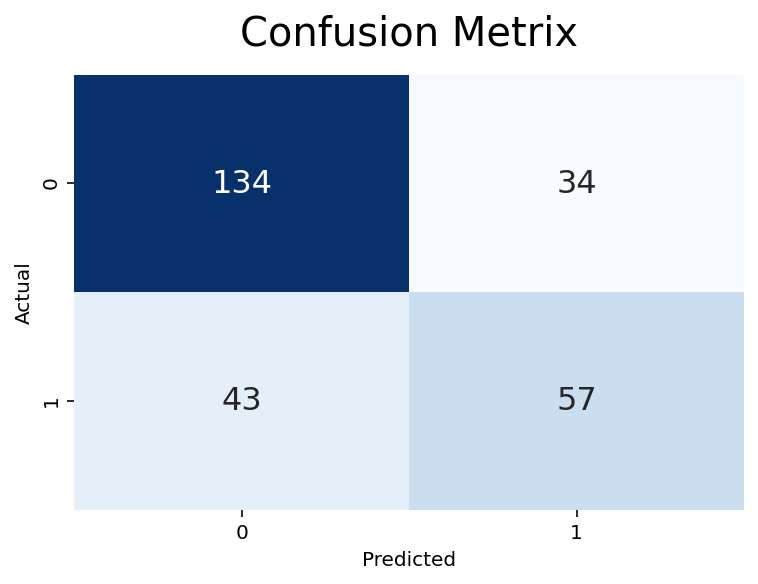

In [25]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot = True,
           cmap = 'Blues',
           cbar = False,
            fmt = 'g',
           annot_kws = {'size' : 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Metrix', size = 20, pad = 15)
plt.show()



**2) Accuracy**

In [ ]:
# 모듈 불러오기


# 성능 평가


**3) Precision**

In [ ]:
# 모듈 불러오기


# 성능 평가


**4) Recall**

In [ ]:
# 모듈 불러오기


# 성능 평가


**5) F1**

In [ ]:
# 모듈 불러오기


# 성능 평가


**6) Classification Report**

In [27]:
# 모듈 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       168
           1       0.63      0.57      0.60       100

    accuracy                           0.71       268
   macro avg       0.69      0.68      0.69       268
weighted avg       0.71      0.71      0.71       268



**7) 참고 : Score**

In [28]:
model.score(x_test, y_test)

0.7126865671641791